In [9]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2
%reload_ext tensorboard
import os
import torch
import torchvision
import torchvision.transforms.functional as fn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from models.models import LPCNNv1
from models.lpcnnv2 import LPCNNv2
from src.data.car_plate_dataset import UFPRDataset, id_to_filepath, annotate_frame_with_bb

In [10]:
# os.chdir(r"C:\Users\Arya\PycharmProjects\projectSentry\ProjectSentry\models\models\lightning_logs")
%tensorboard --logdir=C:/Users/Arya/PycharmProjects/projectSentry/ProjectSentry/models/models/lightning_logs

Launching TensorBoard...

In [120]:
train_dataset = UFPRDataset(
    "C:\\Users\\Arya\\PycharmProjects\\projectSentry\\ProjectSentry\\data\\raw\\UFPR-ALPR dataset\\training",
    normalize=torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    resize=torchvision.transforms.Resize(size=500),
    # grayscale=torchvision.transforms.Grayscale()
)
val_dataset = UFPRDataset(
    "C:\\Users\\Arya\\PycharmProjects\\projectSentry\\ProjectSentry\\data\\raw\\UFPR-ALPR dataset\\validation",
    resize=torchvision.transforms.Resize(size=500),
    normalize=torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
)

finished setting up data
finished setting up data


In [4]:
# train_dataset.labels.items()
# train_dataset.__getitem__(29)
# train_dataset.labels["000130"][1]

In [5]:
a = torch.rand((1, 500, 888, 3))
print(a.shape)
print(a.transpose(1, 3).shape)

torch.Size([1, 500, 888, 3])
torch.Size([1, 3, 888, 500])


In [87]:
os.chdir(r"C:\Users\Arya\PycharmProjects\projectSentry\ProjectSentry\models\models")
train_dataloader = DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, num_workers=8)
logger = TensorBoardLogger('lightning_logs')
trainer = pl.Trainer(max_epochs=40, logger=logger)
model = LPCNNv2()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using cache found in C:\Users\Arya/.cache\torch\hub\pytorch_vision_v0.10.0


In [11]:
# import glob
# import pandas as pd
# os.chdir(r"C:\Users\Arya\PycharmProjects\projectSentry\ProjectSentry\models\models\lightning_logs\lightning_logs")
# list_of_files = glob.glob('**/*.ckpt', recursive=True)
# list(enumerate(list_of_files))[5:]

In [12]:
# trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

In [14]:
# import glob
# import pandas as pd
# os.chdir(r"C:\Users\Arya\PycharmProjects\projectSentry\ProjectSentry\models\models\lightning_logs\lightning_logs")
# list_of_files = glob.glob('**/*.ckpt', recursive=True)
# data = np.zeros(shape=(2, 2))
# print(list_of_files)
#
# for i, j in enumerate(list_of_files):
#     path = os.path.join(r"C:\Users\Arya\PycharmProjects\projectSentry\ProjectSentry\models\models\lightning_logs\lightning_logs", j)
#     model = LPCNNv2.load_from_checkpoint(path)
#     model.eval()
#     # results = trainer.validate(model=model, dataloaders=val_dataloader)
#     data[i, 0] = results[0]["val_accuracy"]
#     data[i, 1] = results[0]["val_loss"]
#
# df = pd.DataFrame(data, index=list_of_files,  columns=["Accuracy", "Loss"])
# df


In [16]:
model = LPCNNv2.load_from_checkpoint(r"C:\Users\Arya\PycharmProjects\projectSentry\ProjectSentry\models\models\lightning_logs\lightning_logs\version_32_Normed_F1_100_DIoU_Acc_IoU\checkpoints\epoch=31-step=1824.ckpt")
model.eval()

Using cache found in C:\Users\Arya/.cache\torch\hub\pytorch_vision_v0.10.0


LPCNNv2(
  (features1): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (5): BasicConv2d(
      (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1

True (blue): [286 209 324 223]
Model predicted (red): tensor([357.7198, 162.0351, 413.6630, 184.3158])


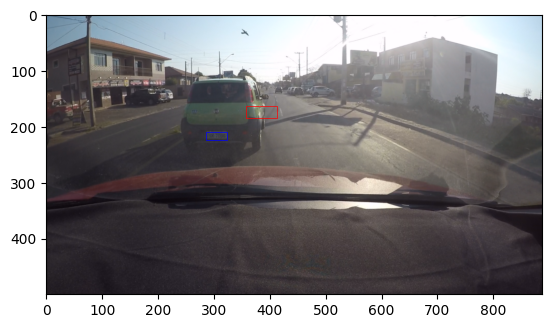

In [55]:
%matplotlib inline
# Testing one output from the trained model
plt.close()

photo_set = "0100"
num = "03"
image_id = f"track{photo_set}[{num}]"
os.chdir(fr"C:/Users/Arya/PycharmProjects/projectSentry/ProjectSentry/data/raw/UFPR-ALPR dataset/testing/track{photo_set}")
image = Image.open(f"{image_id}.png" )

# image_id = None
# image = Image.open(r"C:\Users\Arya\Downloads\hr_zg2117-gf.jpg")
# non-white lp
# image = Image.open(r"C:\Users\Arya\Downloads\f776700df15847478a0952916dc018a4.jpg")
# image = Image.open(r"C:\Users\Arya\Downloads\Bentley.jpg")

bb_model = model
fig, ax = annotate_frame_with_bb(
    image,
    bb_model,
    torchvision.transforms.Resize(size=500),
    image_id,
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
)
plt.show()